## Упражнение 1

Напишем программу для нахождения корней многочленов Лежандра, используя метод Ньютона.
Воспользуемся тем, что $L'_n(x) = \frac{n}{1 - x^2}[L_{n-1}(x) - x L_n(x)]$.

Также пользуемся перемежаемостью корней. Начальное приближение для каждого нового корня $L_n$ берём как середину отрезка между соседними корнями $L_{n-1}$.

In [61]:
import scipy.special
import numpy as np
import pylab

eps = 1e-6

def polynom(n, x):
    return scipy.special.legendre(n)(x)

def d_polynom(n, x):
    return n / (1 - x ** 2) * (polynom(n - 1, x) - x * polynom(n, x))

def newtons_iteration_method(n, x0):
    xt = x0 - polynom(n, x0) / d_polynom(n, x0)
    while (abs(xt - x0) > eps):
        x0 = xt
        xt = x0 - polynom(n, x0) / d_polynom(n, x0)
    return xt

def find_roots(n):
    if n == 0:
        return []
    
    res = []
    prev_roots = [-1] + find_roots(n - 1) + [1]
    prev_roots_size = len(prev_roots)
    
    for i in range(0, prev_roots_size - 1):
        x0 = (prev_roots[i] + prev_roots[i + 1]) / 2
        res.append(newtons_iteration_method(n, x0))
        
    return res


Вычислим веса соответствующей формулы Гаусса, используя метод Симпсона.

Явное выражение для весов:

$w_i = \int^a_b \prod_{k \neq i} \frac{x - x_k}{x_i - x_k} \rho(x) dx$

В случае полиномов Лежандра $\rho(x) = 1$.

In [42]:
def simpson_method(f, a, b, M=1000):
    H = (b - a) / M
    ans = 0
    
    k = 0
    while (k <= M):
        coeff = 1
    
        if (k == 0 or k == M):
            coeff = 1
        elif ((2 * k) % 2 == 0):    
            coeff = 2
        else:
            coeff = 4
            
        ans += coeff * f(a + k * H) 
        k += 0.5
            
    return ans * H / 6

def prod(roots, i):
    def f(x):
        pr = 1
        size = len(roots)
        for k in range(0, size):
            if (k != i):
                pr *= (x - roots[k]) / (roots[i] - roots[k])
        return pr        
        
    return f
        
def get_weights(a, b, n):
    roots = find_roots(n)
    weights = [simpson_method(prod(roots, i), a, b) for i in range(0, n)]
    return weights     

Напишем программу, вычисляющую $I$ с помощью полученной квадратурной формулы.

In [51]:
def func(x):
    return 1 / (1 + 9 * x ** 2);

def int_func(x):
    return 1 / 3 * np.arctan(3 * x)

a = -1
b = 5

int_val = int_func(b) - int_func(a)
print(int_val)

0.9177579784724423


In [58]:
def calc_i_quadrature_formula(n, a, b):
    roots0 = find_roots(n)
    roots = [(b - a) * x / 2 + (b + a) / 2 for x in roots0]
    weights = get_weights(-1, 1, n)
    
    return (b - a) * 0.5 * sum([func(x) * w for x, w in zip(roots, weights)])
    
print(calc_i_quadrature_formula(50, -1, 5)) 

0.9177586095786642


Построим графики погрешностей в зависимости от числа узлов для метода с использованием квадратурной формулы и для метода Симпсона.

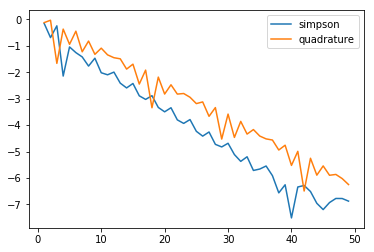

In [66]:
nodes_num = [i for i in range(1, 50)]

simpson_method_ys = [np.log10(abs(int_val - simpson_method(func, -1, 5, i))) for i in nodes_num]
quadrature_method_ys = [np.log10(abs(int_val - calc_i_quadrature_formula(i, -1, 5))) for i in nodes_num]

pylab.plot(nodes_num, simpson_method_ys, label="simpson")
pylab.plot(nodes_num, quadrature_method_ys, label="quadrature")
pylab.legend()
pylab.show()

Глядя на графики погрешности, можно заметить следующее. Метод Симпсона ведёт себя лучше, давая меньшую погрешность практически на всём рассмотренном участке. Если говорить о методе с использованием квадратурной формулы Гаусса, то его график погрешности показывает линейную зависимость (основная тенденция). Это говорит об экспоненциальном убывании погрешности такого метода.